# CASO PRÁCTICO: ANALISIS DE VENTAS


Los **datos** contienen cientos de miles de **compras realizadas en una tienda de electrónicos** desglosadas por mes, tipo de producto, costo, dirección de compra, etc.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## warnings package: si queremos eliminar los warnings

import warnings
from warnings import filterwarnings
filterwarnings('ignore')

## Leemos los datos tipo feather


**Feather** es un formato de archivo binario que se utiliza para almacenar datos. Feather es un formato de archivo binario rápido, ligero y fácil de usar para almacenar datos. Muestra una alta velocidad de entrada/salida, no ocupa demasiada memoria en el disco y no requiere desempaquetado al cargarlo de nuevo en la RAM.


In [ ]:
archivo_path = 'Sales_data.ftr'

data = pd.read_feather(archivo_path)

In [4]:
data.sample(6)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
24880,242898,Wired Headphones,1,11.99,08/11/19 08:50,"619 Maple St, Atlanta, GA 30301"
149471,290588,AA Batteries (4-pack),1,3.84,11/04/19 07:31,"144 7th St, Atlanta, GA 30301"
19284,237539,Wired Headphones,1,11.99,08/11/19 08:49,"844 Elm St, San Francisco, CA 94016"
111349,167813,27in 4K Gaming Monitor,1,389.99,04/01/19 02:42,"840 11th St, Seattle, WA 98101"
152656,293642,iPhone,1,700,11/30/19 15:49,"652 Jackson St, San Francisco, CA 94016"
136019,208879,Lightning Charging Cable,1,14.95,05/21/19 19:24,"381 Sunset St, San Francisco, CA 94016"


## Limpieza y formateo

## 1. Limpiamos 

In [5]:
data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
# Eliminamos los nulos

data.dropna(inplace=True)

In [7]:
data.isnull().any()

Order ID            False
Product             False
Quantity Ordered    False
Price Each          False
Order Date          False
Purchase Address    False
dtype: bool

In [8]:
# Vemos los duplicados

data.duplicated().sum()

np.int64(618)

In [9]:
# Quitamos los registros que tienen como valores los nombres de los campos

data = data[~(data.astype(str) == data.columns).all(axis=1)]

In [10]:
#Para ver los duplicados

duplicados = data[data.duplicated(keep=False)]
duplicados = duplicados.sort_values(by='Order ID')
duplicados.head(20)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
68422,142071,AA Batteries (4-pack),1,3.84,01/17/19 23:02,"131 2nd St, Boston, MA 02215"
68421,142071,AA Batteries (4-pack),1,3.84,01/17/19 23:02,"131 2nd St, Boston, MA 02215"
71673,145143,Lightning Charging Cable,1,14.95,01/06/19 03:01,"182 Jefferson St, San Francisco, CA 94016"
71672,145143,Lightning Charging Cable,1,14.95,01/06/19 03:01,"182 Jefferson St, San Francisco, CA 94016"
73358,146765,Google Phone,1,600,01/21/19 11:23,"918 Highland St, New York City, NY 10001"
73357,146765,Google Phone,1,600,01/21/19 11:23,"918 Highland St, New York City, NY 10001"
74353,147707,Wired Headphones,1,11.99,01/04/19 16:50,"883 4th St, Dallas, TX 75001"
74354,147707,Wired Headphones,1,11.99,01/04/19 16:50,"883 4th St, Dallas, TX 75001"
75680,148984,USB-C Charging Cable,1,11.95,01/08/19 17:36,"562 14th St, Boston, MA 02215"
75681,148984,USB-C Charging Cable,1,11.95,01/08/19 17:36,"562 14th St, Boston, MA 02215"


In [11]:
data.drop_duplicates(keep='last', inplace=True)

In [ ]:
#Verificamos que no queden duplciados

data[data.duplicated(keep=False)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


## 2. Añadimos columnas

In [13]:
data["Order Date"] = pd.to_datetime(data["Order Date"], format="%m/%d/%y %H:%M", errors="coerce")

In [14]:
data["month"] = data["Order Date"].dt.month.astype("Int64")
data["year"] = data["Order Date"].dt.year.astype("Int64")
data["day"] = data["Order Date"].dt.day.astype("Int64")
data["month_name"] = data["Order Date"].dt.month_name()

In [15]:
def extract_city(address):
    if pd.notna(address) and "," in address:
        parts = address.split(",")
        if len(parts) > 1:
            return parts[1].strip()  
    return None  

data["city"] = data["Purchase Address"].apply(extract_city)

In [16]:
data.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,year,day,month_name,city
9591,185715,Apple Airpods Headphones,1,150,2019-04-28 10:16:00,"749 Elm St, Portland, OR 97035",4,2019,28,April,Portland
15491,191335,iPhone,1,700,2019-04-08 12:58:00,"122 12th St, Seattle, WA 98101",4,2019,8,April,Seattle
95507,213591,Apple Airpods Headphones,1,150,2019-06-30 14:01:00,"642 Spruce St, Dallas, TX 75001",6,2019,30,June,Dallas
67502,161966,Bose SoundSport Headphones,1,99.99,2019-02-19 18:58:00,"540 Dogwood St, Atlanta, GA 30301",2,2019,19,February,Atlanta
146359,287623,Apple Airpods Headphones,1,150,2019-11-28 18:17:00,"348 10th St, San Francisco, CA 94016",11,2019,28,November,San Francisco


## Análisis

### ¿Cuál es el mejor mes para las ventas?

Primero, entendamos qué significa exactamente el término '**el mejor**': si algún mes tiene las ventas máximas, lo consideraremos como el mejor.

In [17]:
# Añadimos una columna para ver el total comprado

data["Quantity Ordered"] = pd.to_numeric(data["Quantity Ordered"], errors="coerce")
data["Price Each"] = pd.to_numeric(data["Price Each"], errors="coerce")

data["Total"] = data["Quantity Ordered"] * data["Price Each"]

In [18]:
ventas_mes = data.groupby("month")["Total"].sum()
ventas_mes

month
1     1821413.16
2     2200078.08
3     2804973.35
4     3389217.98
5     3150616.23
6     2576280.15
7     2646461.32
8     2241083.37
9     2094465.69
10    3734777.86
11    3197875.05
12    4608295.70
Name: Total, dtype: float64

In [19]:
mejor_mes = ventas_mes.idxmax()
print(mejor_mes)
ventas_maximas = ventas_mes.max()
print(ventas_maximas)

12
4608295.7


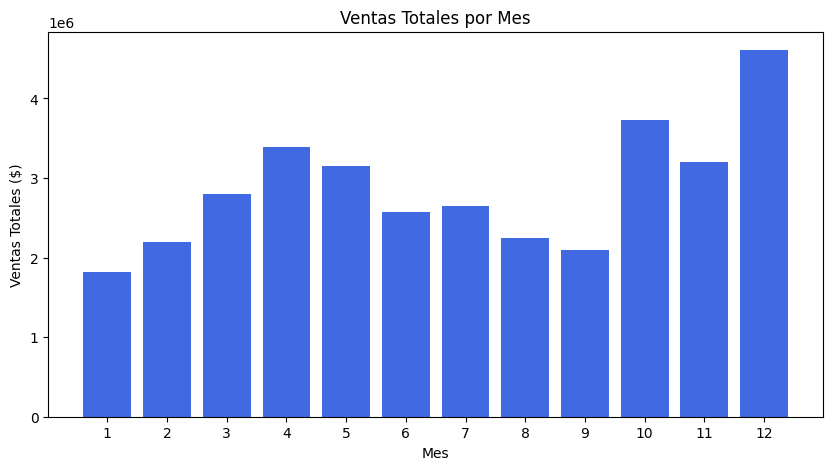

In [20]:
import matplotlib.pyplot as plt
# Suponiendo que ventas_mes es un DataFrame o Serie con los meses como índice y las ventas como valores
plt.figure(figsize=(10, 5))  # Ajustar el tamaño del gráfico
plt.bar(ventas_mes.index, ventas_mes.values, color='royalblue')  # Crear gráfico de barras

# Agregar títulos y etiquetas
plt.xlabel("Mes")
plt.ylabel("Ventas Totales ($)")
plt.title("Ventas Totales por Mes")
plt.xticks(ventas_mes.index)  # Asegurar que todos los meses aparezcan en el eje X

# Mostrar el gráfico
plt.show()

### ¿Qué ciudad tiene el pedido máximo?

In [21]:
data.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,year,day,month_name,city,Total
9024,185174,iPhone,1,700.00,2019-04-17 10:44:00,"189 Lincoln St, Los Angeles, CA 90001",4,2019,17,April,Los Angeles,700.00
29482,247289,Lightning Charging Cable,1,14.95,2019-08-17 15:22:00,"247 Church St, Boston, MA 02215",8,2019,17,August,Boston,14.95
144751,286093,AA Batteries (4-pack),1,3.84,2019-11-16 20:12:00,"763 14th St, Los Angeles, CA 90001",11,2019,16,November,Los Angeles,3.84
119881,175973,Bose SoundSport Headphones,1,99.99,2019-03-13 18:03:00,"378 Walnut St, Atlanta, GA 30301",3,2019,13,March,Atlanta,99.99
139871,281431,USB-C Charging Cable,1,11.95,2019-11-22 12:39:00,"865 8th St, Dallas, TX 75001",11,2019,22,November,Dallas,11.95


In [22]:
ciudad_pedidos_maximos = data.groupby("city")["Quantity Ordered"].count().reset_index().sort_values(by='Quantity Ordered', ascending=False)
ciudad_pedidos_maximos

,city,Quantity Ordered
7,San Francisco,44662
4,Los Angeles,29564
5,New York City,24847
2,Boston,19901
0,Atlanta,14863
3,Dallas,14797
8,Seattle,14713
6,Portland,12449
1,Austin,9890


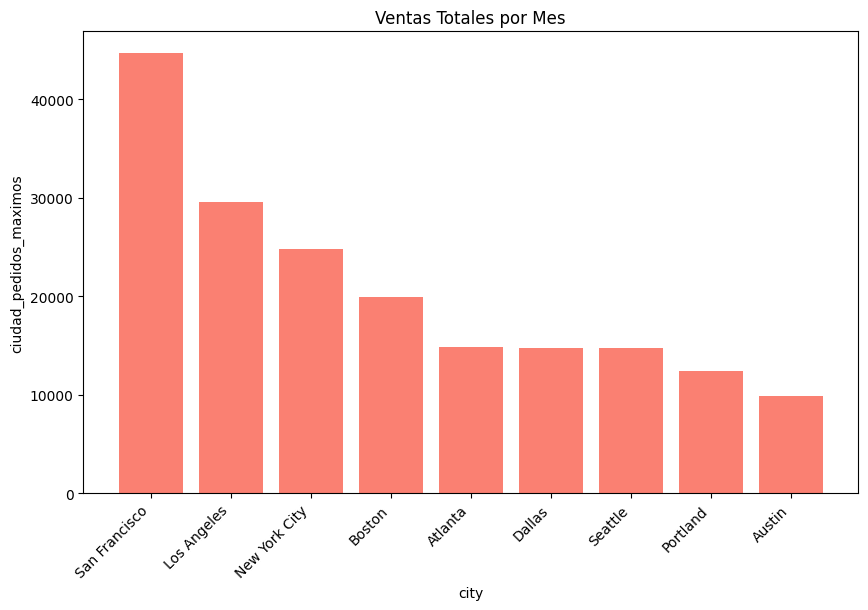

In [ ]:
plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico
plt.bar(ciudad_pedidos_maximos['city'], ciudad_pedidos_maximos['Quantity Ordered'], color='salmon')  # Crear gráfico de barras

# Agregar títulos y etiquetas
plt.xlabel("city")
plt.ylabel("ciudad_pedidos_maximos")
plt.title("Ventas Totales")
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()

### ¿Qué producto se vendió más y por qué?

In [24]:
data.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,year,day,month_name,city,Total
151106,292159,Bose SoundSport Headphones,1,99.99,2019-11-30 13:22:00,"122 10th St, Dallas, TX 75001",11,2019,30,November,Dallas,99.99
11188,187240,USB-C Charging Cable,1,11.95,2019-04-07 16:40:00,"897 South St, Boston, MA 02215",4,2019,7,April,Boston,11.95
124295,197712,AAA Batteries (4-pack),2,2.99,2019-05-09 13:40:00,"543 Church St, Los Angeles, CA 90001",5,2019,9,May,Los Angeles,5.98
133898,206846,Bose SoundSport Headphones,1,99.99,2019-05-29 03:37:00,"99 Jackson St, Los Angeles, CA 90001",5,2019,29,May,Los Angeles,99.99
55677,150662,Wired Headphones,1,11.99,2019-02-01 15:57:00,"403 North St, Dallas, TX 75001",2,2019,1,February,Dallas,11.99


In [25]:
producto_mas_vendido = data.groupby("Product")["Quantity Ordered"].sum().reset_index().sort_values(by="Quantity Ordered", ascending=False)
producto_mas_vendido

,Product,Quantity Ordered
5,AAA Batteries (4-pack),30986
4,AA Batteries (4-pack),27615
15,USB-C Charging Cable,23931
12,Lightning Charging Cable,23169
17,Wired Headphones,20524
6,Apple Airpods Headphones,15637
7,Bose SoundSport Headphones,13430
2,27in FHD Monitor,7541
18,iPhone,6847
1,27in 4K Gaming Monitor,6239


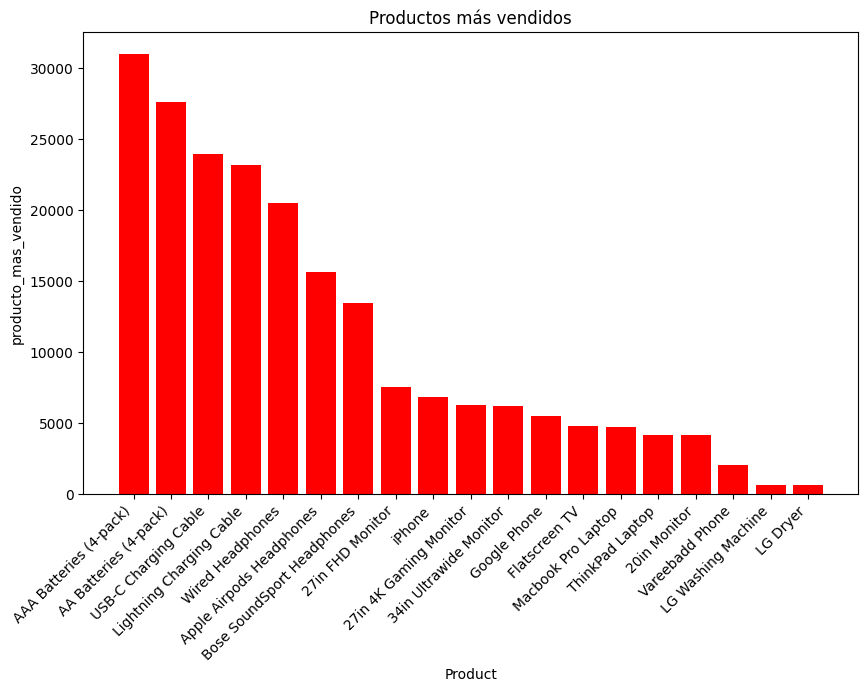

In [26]:
plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico
plt.bar(producto_mas_vendido['Product'], producto_mas_vendido['Quantity Ordered'], color='red')  # Crear gráfico de barras

# Agregar títulos y etiquetas
plt.xlabel("Product")
plt.ylabel("producto_mas_vendido")
plt.title("Productos más vendidos")
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()

In [27]:
data.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,year,day,month_name,city,Total
171542,275342,Lightning Charging Cable,1,14.95,2019-10-19 16:48:00,"738 West St, San Francisco, CA 94016",10,2019,19,October,San Francisco,14.95
29879,247664,Lightning Charging Cable,1,14.95,2019-08-03 15:26:00,"965 Ridge St, San Francisco, CA 94016",8,2019,3,August,San Francisco,14.95
97129,215126,Bose SoundSport Headphones,1,99.99,2019-06-17 17:40:00,"189 River St, New York City, NY 10001",6,2019,17,June,New York City,99.99
2054,178516,Lightning Charging Cable,1,14.95,2019-04-17 23:43:00,"845 14th St, Los Angeles, CA 90001",4,2019,17,April,Los Angeles,14.95
149796,290901,Lightning Charging Cable,1,14.95,2019-11-15 01:20:00,"82 Elm St, New York City, NY 10001",11,2019,15,November,New York City,14.95


In [28]:
precios_productos = data.groupby("Product")["Price Each"].max().reset_index().sort_values(by="Price Each", ascending=True)
precios_productos

,Product,Price Each
5,AAA Batteries (4-pack),2.99
4,AA Batteries (4-pack),3.84
15,USB-C Charging Cable,11.95
17,Wired Headphones,11.99
12,Lightning Charging Cable,14.95
7,Bose SoundSport Headphones,99.99
0,20in Monitor,109.99
2,27in FHD Monitor,149.99
6,Apple Airpods Headphones,150.00
8,Flatscreen TV,300.00


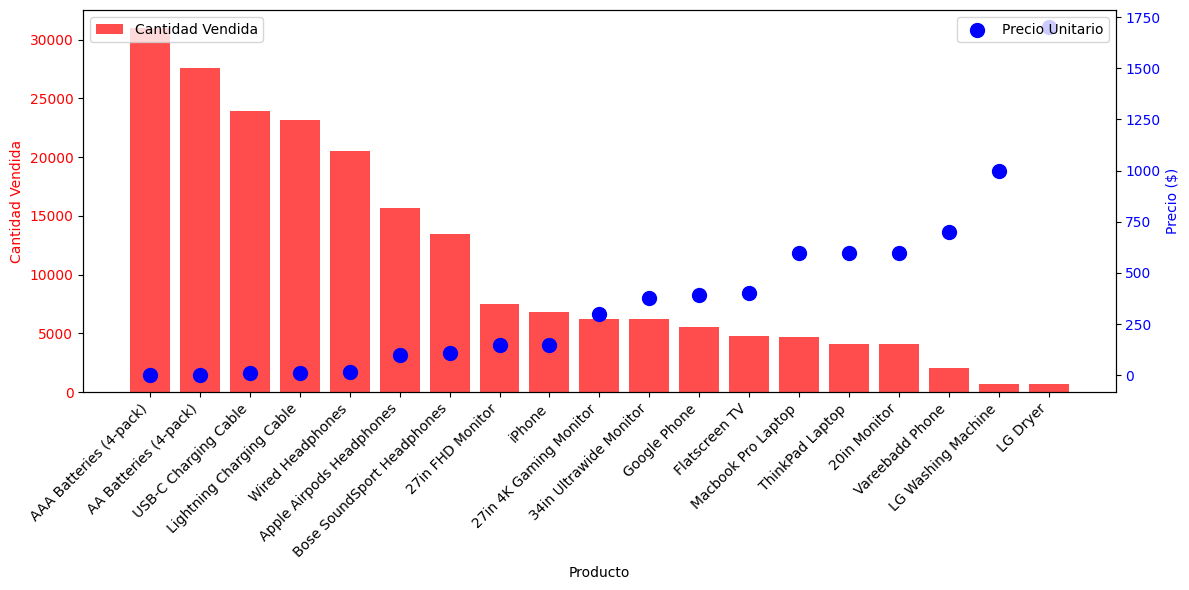

In [29]:
import matplotlib.pyplot as plt

# Crear la figura
fig, ax1 = plt.subplots(figsize=(12, 6))

# 📊 Gráfico de barras (Cantidad Vendida)
bars = ax1.bar(producto_mas_vendido["Product"], producto_mas_vendido["Quantity Ordered"], 
               color='red', label="Cantidad Vendida", alpha=0.7)

# Etiquetas y formato del eje Y izquierdo
ax1.set_xlabel("Producto")
ax1.set_ylabel("Cantidad Vendida", color='red')
ax1.tick_params(axis='y', labelcolor='red')

# 📈 Segundo eje Y para el precio de los productos (solo puntos)
ax2 = ax1.twinx()
ax2.scatter(producto_mas_vendido["Product"], precios_productos["Price Each"], 
            color='blue', marker='o', s=100, label="Precio Unitario")

# Etiquetas y formato del eje Y derecho
ax2.set_ylabel("Precio ($)", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# 📌 Rotar etiquetas del eje X correctamente
ax1.set_xticks(range(len(producto_mas_vendido["Product"])))  # Fijar los ticks
ax1.set_xticklabels(producto_mas_vendido["Product"], rotation=45, ha='right')  # Rotar nombres

# Ajustar márgenes para evitar que se corten las etiquetas
plt.tight_layout()

# Agregar leyendas
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Mostrar el gráfico
plt.show()
